# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
   
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort mcmurray
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ephrata
Processing Record 7 of Set 1 | castro de rei
Processing Record 8 of Set 1 | jilib
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | pandan
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | saint-yrieix-la-perche
Processing Record 13 of Set 1 | ujae
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | monson
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | antsiranana
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 1 | bre

Processing Record 44 of Set 4 | ulaangom
Processing Record 45 of Set 4 | wuwei
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 48 of Set 4 | gadzhiyevo
Processing Record 49 of Set 4 | zungeru
Processing Record 0 of Set 5 | itoman
Processing Record 1 of Set 5 | saratamata
City not found. Skipping...
Processing Record 2 of Set 5 | nemuro
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | anadyr
Processing Record 5 of Set 5 | spassk
Processing Record 6 of Set 5 | nehe
Processing Record 7 of Set 5 | praia da vitoria
Processing Record 8 of Set 5 | mae sot
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | novouzensk
Processing Record 11 of Set 5 | kudahuvadhoo
Processing Record 12 of Set 5 | coquimbo
Processing Record 13 of Set 5 | lerwick
Processing Record 14 of Set 5 | freeport
Processing Record 15 of Set 5 | mokhotlong
Processing Record 16 of Set 5 | villa gesel

Processing Record 33 of Set 8 | brak
Processing Record 34 of Set 8 | east london
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | harper
Processing Record 37 of Set 8 | vilyuysk
Processing Record 38 of Set 8 | rochester
Processing Record 39 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 40 of Set 8 | broken hill
Processing Record 41 of Set 8 | whangarei
Processing Record 42 of Set 8 | ulu tiram
Processing Record 43 of Set 8 | west island
Processing Record 44 of Set 8 | mtimbira
Processing Record 45 of Set 8 | isfahan
Processing Record 46 of Set 8 | bathsheba
Processing Record 47 of Set 8 | ulsteinvik
Processing Record 48 of Set 8 | porto novo
Processing Record 49 of Set 8 | khanty-mansiysk
Processing Record 0 of Set 9 | ascencion de guarayos
City not found. Skipping...
Processing Record 1 of Set 9 | nur-sultan
Processing Record 2 of Set 9 | tangalle
Processing Record 3 of Set 9 | wuchuan
Processing Record 4 of Set 9 | kaspiysk
Processing R

Processing Record 18 of Set 12 | kargasok
Processing Record 19 of Set 12 | letlhakane
Processing Record 20 of Set 12 | chambas
Processing Record 21 of Set 12 | chicxulub puerto
City not found. Skipping...
Processing Record 22 of Set 12 | fisterra
Processing Record 23 of Set 12 | uchiza
Processing Record 24 of Set 12 | waterloo
Processing Record 25 of Set 12 | kharp
Processing Record 26 of Set 12 | laizhou
Processing Record 27 of Set 12 | toliara
Processing Record 28 of Set 12 | nahiyat ash shinafiyah
Processing Record 29 of Set 12 | iwanai
Processing Record 30 of Set 12 | antonio enes
Processing Record 31 of Set 12 | blagoveshchenka
Processing Record 32 of Set 12 | brady
Processing Record 33 of Set 12 | sotuta
Processing Record 34 of Set 12 | hayma'
City not found. Skipping...
Processing Record 35 of Set 12 | tournon-sur-rhone
Processing Record 36 of Set 12 | kedrovyy
Processing Record 37 of Set 12 | sao francisco
Processing Record 38 of Set 12 | suntar
Processing Record 39 of Set 12 |

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort mcmurray,56.7268,-111.3810,-2.23,86,100,3.60,CA,1703128748
1,adamstown,-25.0660,-130.1015,23.36,81,100,4.96,PN,1703128748
2,avarua,-21.2078,-159.7750,25.03,78,75,3.60,CK,1703128749
3,albany,42.6001,-73.9662,1.48,79,49,3.99,US,1703128749
4,waitangi,-43.9535,-176.5597,15.33,96,4,7.33,NZ,1703128749


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,-2.23,86,100,3.60,CA,1703128748
1,adamstown,-25.0660,-130.1015,23.36,81,100,4.96,PN,1703128748
2,avarua,-21.2078,-159.7750,25.03,78,75,3.60,CK,1703128749
3,albany,42.6001,-73.9662,1.48,79,49,3.99,US,1703128749
4,waitangi,-43.9535,-176.5597,15.33,96,4,7.33,NZ,1703128749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

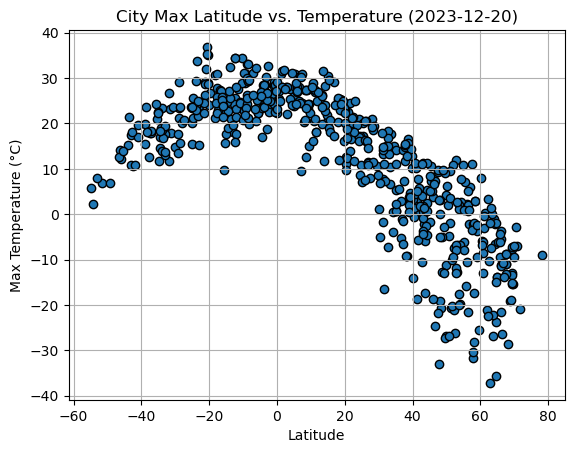

In [60]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)') 
plt.grid(True, which = 'both')

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

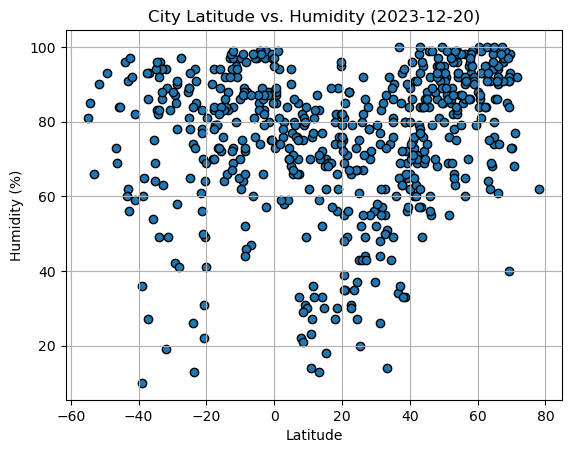

In [61]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-12-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)') 
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

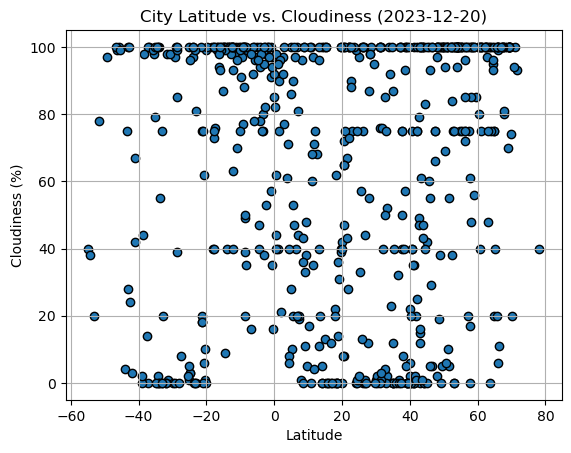

In [62]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-12-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)') 
plt.grid(True, which = 'both')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

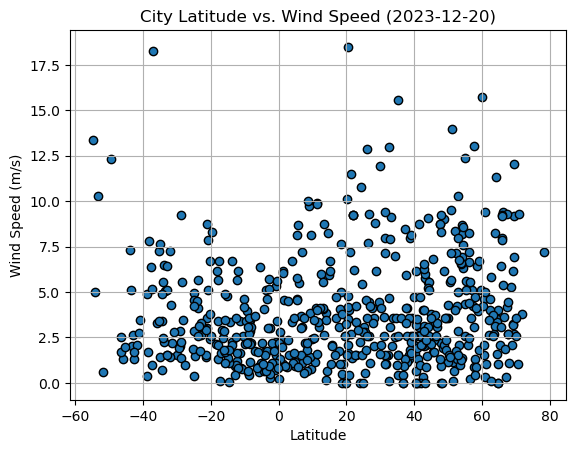

In [63]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-12-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)') 
plt.grid(True, which = 'both')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def lin_regree_plot_func(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regressed_values = (slope * x_values) + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regressed_values, color='r')
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    correlation_coefficient = f'The r-value is: {rvalue}'
    return correlation_coefficient
    print(correlation_coefficient)
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,-2.23,86,100,3.60,CA,1703128748
3,albany,42.6001,-73.9662,1.48,79,49,3.99,US,1703128749
5,ephrata,40.1798,-76.1788,3.30,66,0,2.57,US,1703128749
6,castro de rei,42.7167,-7.5667,5.20,98,79,0.34,ES,1703128749
7,jilib,0.4883,42.7854,25.06,87,44,2.81,SO,1703128749


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,23.36,81,100,4.96,PN,1703128748
2,avarua,-21.2078,-159.7750,25.03,78,75,3.60,CK,1703128749
4,waitangi,-43.9535,-176.5597,15.33,96,4,7.33,NZ,1703128749
8,puerto natales,-51.7236,-72.4875,6.81,90,78,0.61,CL,1703128749
13,port-aux-francais,-49.3500,70.2167,6.94,93,97,12.32,TF,1703128750


###  Temperature vs. Latitude Linear Regression Plot

'The r-value is: -0.8415721095731263'

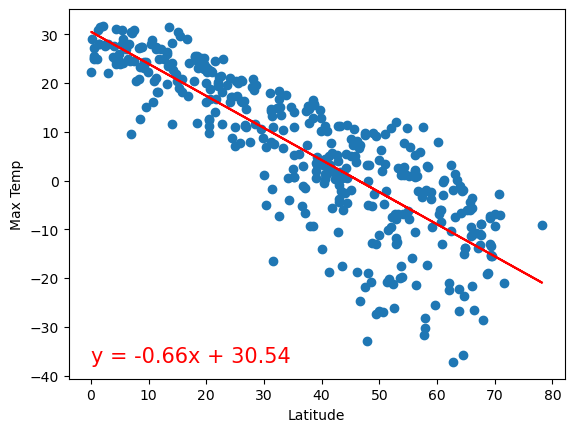

In [67]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

'The r-value is: 0.6416098727410172'

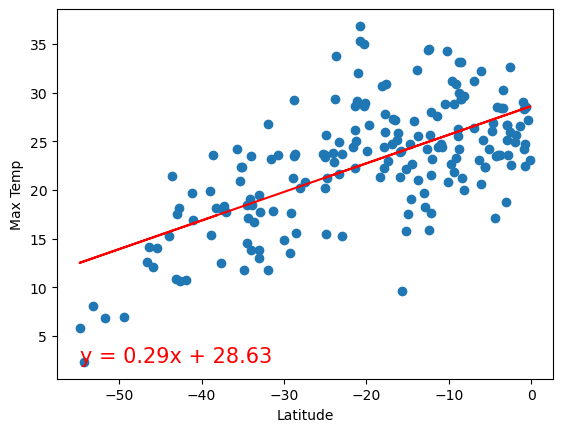

In [68]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

**Discussion about the linear relationship:** The linear regression analysis for the Northern Hemisphere demonstrates a strong negative correlation (r-value: -0.84) between latitude and maximum temperatures, indicating that as you move away from the equator towards higher latitudes, temperatures generally decrease. Conversely, in the Southern Hemisphere, there is a moderate positive correlation (r-value: 0.64) between latitude and maximum temperatures, reflecting the trend of warmer climates closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


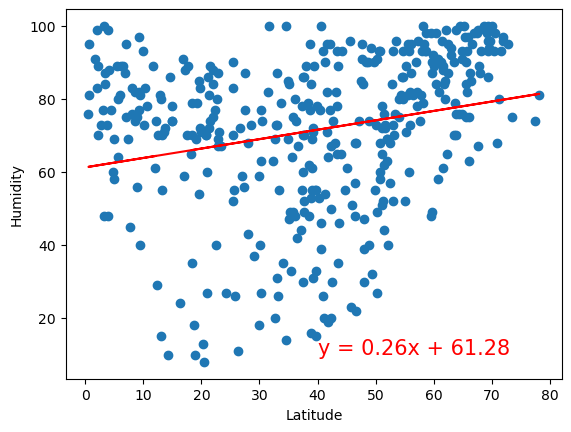

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

'The r-value is: 0.18270781538219402'

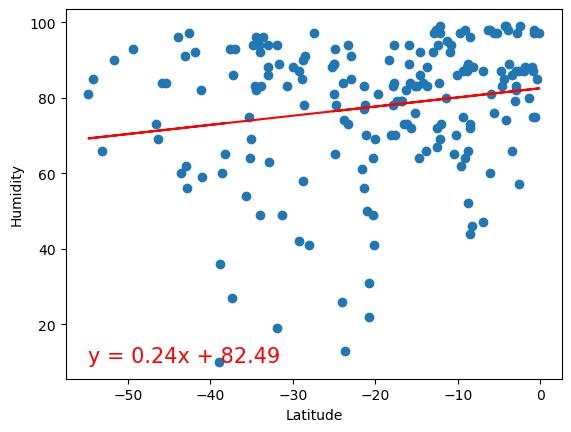

In [69]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

**Discussion about the linear relationship:** 
The linear regression analysis for Humidity versus Latitude reveals a very weak positive correlation in both the Northern Hemisphere (r-value: 0.06) and the Southern Hemisphere (r-value: 0.18). This suggests that there is minimal association between latitude and humidity levels, indicating that other factors may play a more significant role in influencing humidity variations.

### Cloudiness vs. Latitude Linear Regression Plot

'The r-value is: 0.27150741338363654'

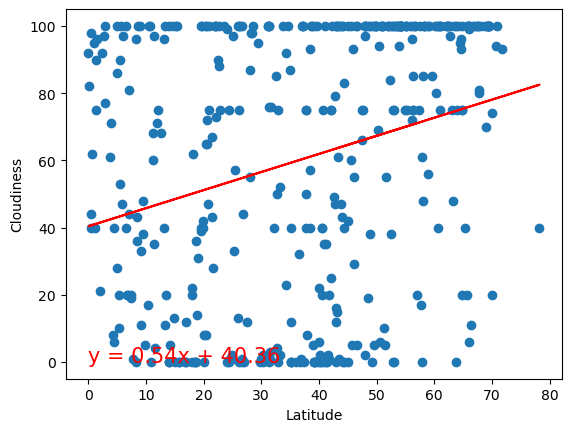

In [70]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

'The r-value is: 0.317730492978169'

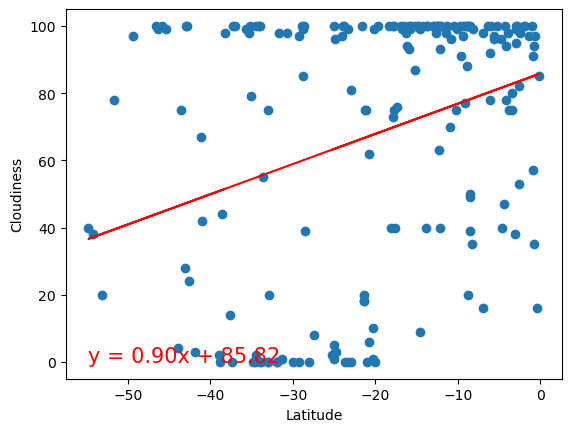

In [71]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
The linear regression analysis for Cloudiness versus Latitude suggests a very weak positive correlation in both the Northern Hemisphere (r-value: 0.27) and the Southern Hemisphere (r-value: 0.32). These results indicate that latitude has a limited influence on cloudiness, implying that other factors likely contribute more significantly to cloud cover variations in different regions.

### Wind Speed vs. Latitude Linear Regression Plot

'The r-value is: 0.10854362977927504'

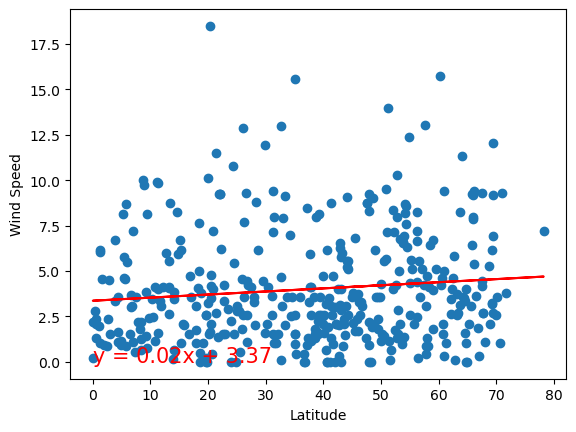

In [72]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

'The r-value is: -0.33153408526026196'

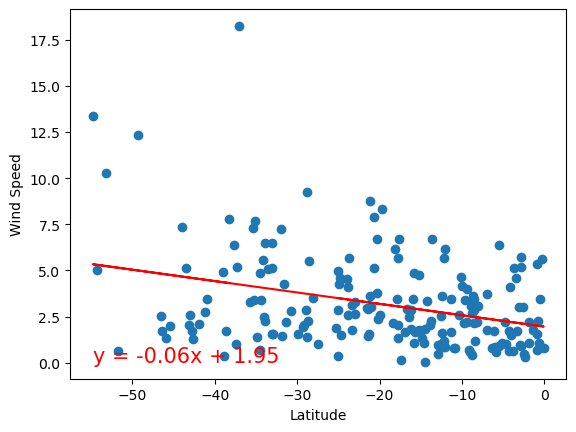

In [73]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** The linear regression analysis for Wind Speed versus Latitude suggests a very weak positive correlation in the Northern Hemisphere (r-value: 0.11), indicating a slight tendency for higher latitudes to have slightly increased wind speeds. Conversely, in the Southern Hemisphere, there is a weak negative correlation (r-value: -0.33), implying a minor decrease in wind speeds as one moves closer to the equator. These results suggest that latitude has limited influence on wind speed variations, and other factors may play a more significant role in determining wind conditions.